# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [2]:
import numpy as np

In [3]:
# Features : 도미의 길이
bream_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

# Target : 도미의 무게
bream_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [19]:
print(bream_length)
print(bream_weight)
print(bream_length.shape)
print(bream_weight.shape)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]
(56,)
(56,)


In [4]:
import matplotlib.pyplot as plt

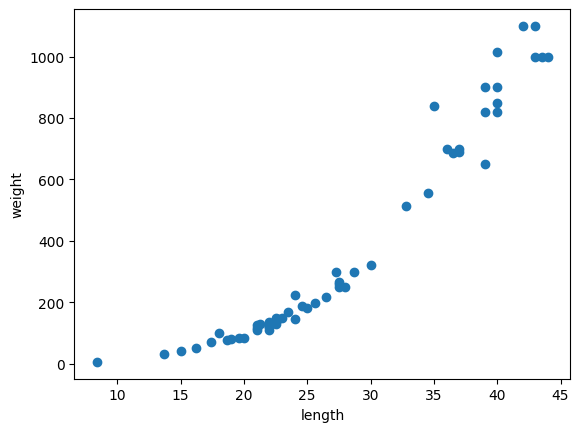

In [5]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

In [16]:
# 훈련 세트와 테스트 세트로 나누
train_input, test_input, train_target, test_target = train_test_split(
    bream_length, bream_weight, random_state=0)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [20]:
# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
print(train_input)
print(test_input)

(42, 1) (14, 1)
[[27.5]
 [40. ]
 [32.8]
 [19. ]
 [22. ]
 [25. ]
 [28.7]
 [40. ]
 [22. ]
 [43. ]
 [28. ]
 [22. ]
 [18. ]
 [26.5]
 [22. ]
 [43.5]
 [22.5]
 [40. ]
 [19.6]
 [21.3]
 [24. ]
 [22. ]
 [36. ]
 [44. ]
 [34.5]
 [13.7]
 [21. ]
 [37. ]
 [24. ]
 [18.7]
 [23.5]
 [30. ]
 [22.7]
 [22.5]
 [20. ]
 [35. ]
 [42. ]
 [16.2]
 [ 8.4]
 [43. ]
 [40. ]
 [39. ]]
[[39. ]
 [27.5]
 [36.5]
 [24.6]
 [21. ]
 [15. ]
 [27.5]
 [37. ]
 [39. ]
 [27.3]
 [17.4]
 [21. ]
 [25.6]
 [23. ]]


## 결정 계수 ($ R^2$)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# k-최근접 이웃 회귀 모델을 훈련
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9831253192289525
0.9162089041423581


In [24]:
from sklearn.metrics import mean_absolute_error

In [32]:
# 테스트 세트에 대한 예측을 만들기
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

42.27142857142858


## 과대적합 vs 과소적합

In [36]:
#새로운 데이터 길이 50일때의 무게를 예측
print(knr.predict([[50]]))

[1000.]


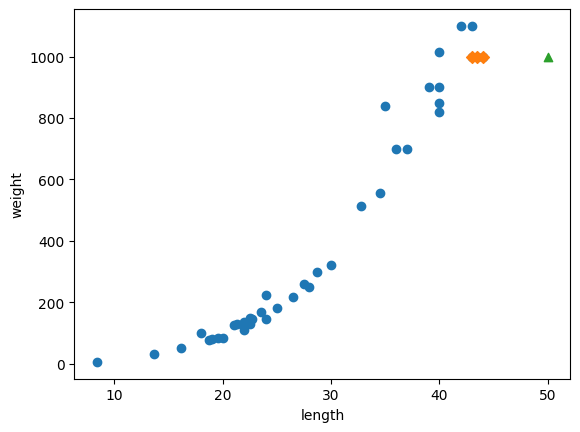

In [39]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm 농어 데이터
plt.scatter(50, 1000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
print(np.mean(train_target[indexes]))

1000.0


In [40]:
print(knr.predict([[100]]))

[1000.]


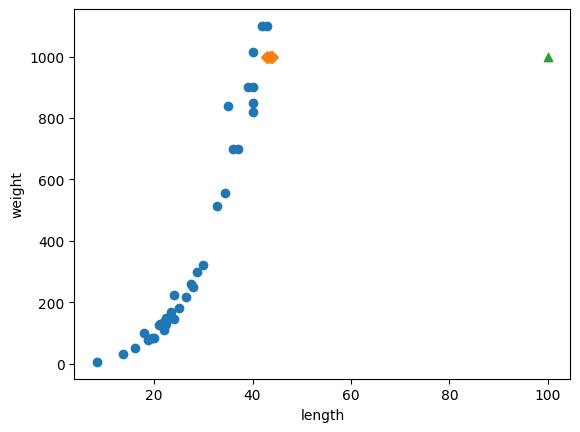

In [41]:
# 100cm 농어의 이웃을 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 100cm 농어 데이터
plt.scatter(100, 1000, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
# 이웃의 갯수를 변경
knr.n_neighbors = 5
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9831253192289525
0.9162089041423581


## 확인

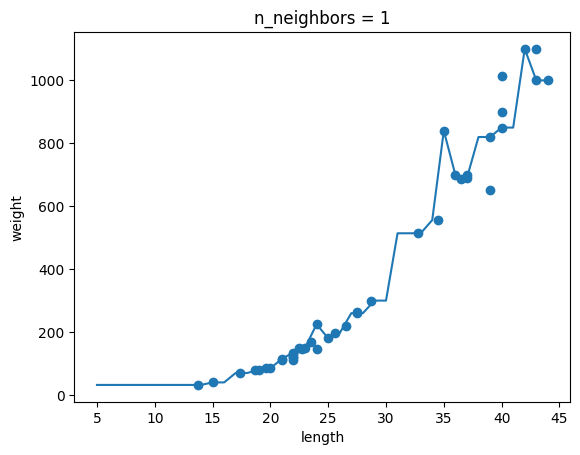

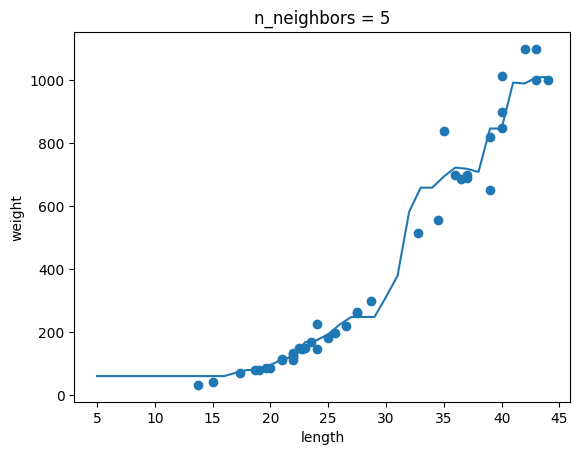

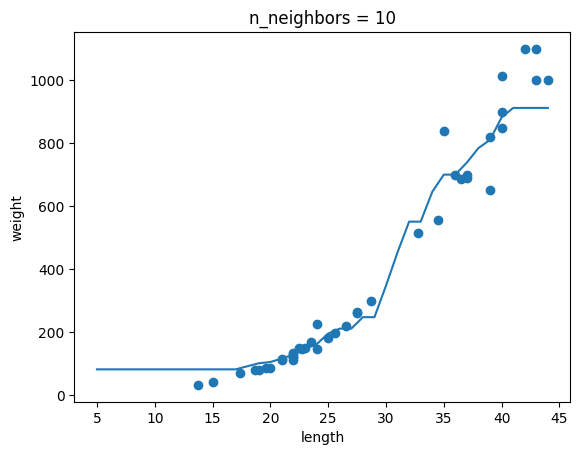

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 선형 회귀

In [43]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 훈련
lr = LinearRegression()

lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))
print(lr.coef_, lr.intercept_)

[1228.52162131]
[37.76648694] -659.8027258214022


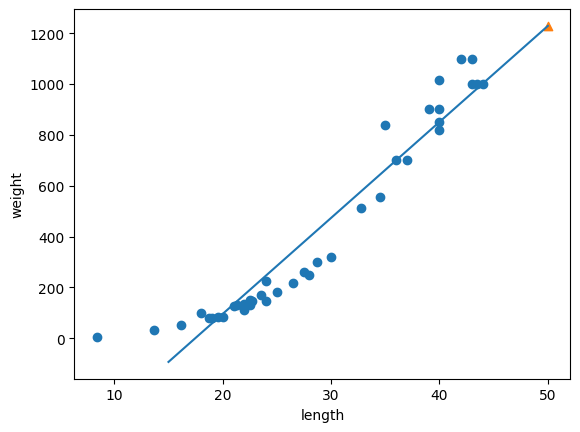

0.922603499955257
0.8803680435261592


In [46]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 15에서 50까지 1차 방정식 그래프를 그리기
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
# 50cm 농어 데이터
plt.scatter(50, 1228.5, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

## 다항 회귀

In [48]:
# 비선형식을 위해서 항 추가
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [50]:
#다항회귀 훈련후 50 예측
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1569.60036007]
[  0.99334411 -20.28904844] 100.6925153656606


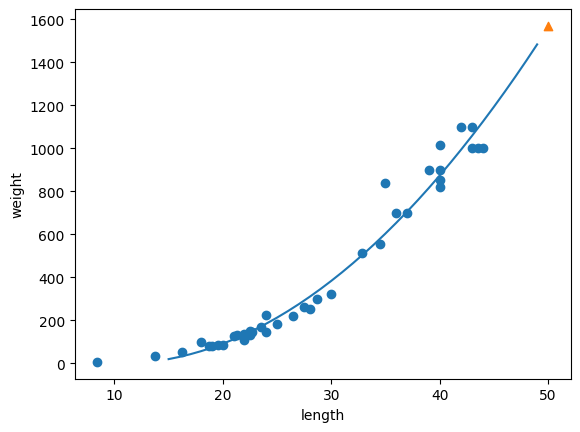

0.9734828103169649
0.9624346725637875


In [55]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만들기
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그리기
plt.plot(point, 0.99*point**2 - 20.3*point + 100.69)
# 50cm 농어 데이터
plt.scatter([50], [1569], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [53]:
#다항회귀 훈련후 50 예측
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[100**2, 100]]))
print(lr.coef_, lr.intercept_)

[8005.22873793]
[  0.99334411 -20.28904844] 100.6925153656606


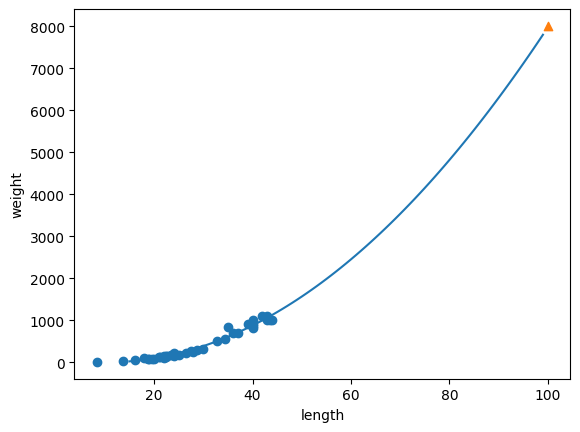

0.9734828103169649
0.9624346725637875


In [54]:
# 구간별 직선을 그리기 위해 15에서 99까지 정수 배열을 만들기
point = np.arange(15, 100)
# 훈련 세트의 산점도를 그리기
plt.scatter(train_input, train_target)
# 15에서 99까지 2차 방정식 그래프를 그리기
plt.plot(point, 0.99*point**2 - 20.29*point + 100.69)
# 100cm 농어 데이터
plt.scatter([100], [8005], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

# 특성 공학과 규제

## 데이터 준비

In [56]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [63]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
print(perch_weight.shape)

(56,)


In [65]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(42, 3)
(42,)
(14, 3)
(14,)


## 사이킷런의 변환기

In [68]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_input.shape)
print(train_input)
print(train_poly.shape)
print(train_poly)


(42, 3)
[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]
 [25.    6.44  3.68]
 [40.   11.93  7.11]
 [39.   12.43  7.35]
 [43.   11.93  7.28]
 [22.    5.64  3.52]
 [20.    5.08  2.77]
 [22.    6.11  3.52]
 [24.    7.29  3.72]
 [27.5   7.17  4.34]
 [43.   12.51  7.42]
 [40.   11.73  7.22]
 [24.    6.38  3.82]
 [21.    5.92  3.31]
 [27.5   7.05  4.34]
 [40.   12.38  7.46]
 [32.8  10.03  6.02]
 [26.5   7.17  4.14]
 [36.5  10.88  6.86]
 [13.7   3.53  2.  ]
 [22.7   5.95  3.63]
 [15.    3.82  2.43]
 [37.   10.57  6.37]
 [35.   11.49  7.8 ]
 [28.7   7.59  4.64]
 [23.5   6.28  3.72]
 [39.   11.14  6.  ]
 [21.    5.69  3.56]
 [23.    5.22  3.63]
 [22.    5.52  4.  ]
 [44.   12.49  7.6 ]
 [22.5   6.79  3.62]
 [19.    5.64  3.05]
 [37.   10.84  6.26]
 [22.    6.11  3.41]
 [25.6   6.56  4.24]
 [42.   12.8   6.87]
 [34.5  10.26  6.39]]
(42, 9)
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22

In [69]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [70]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [75]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
print(test_poly.shape)

(42, 55)
(14, 55)


In [76]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


## 규제

In [77]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지

In [79]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


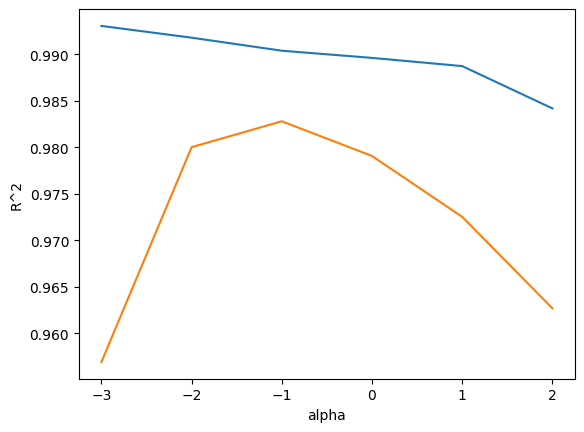

In [80]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [81]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘

In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


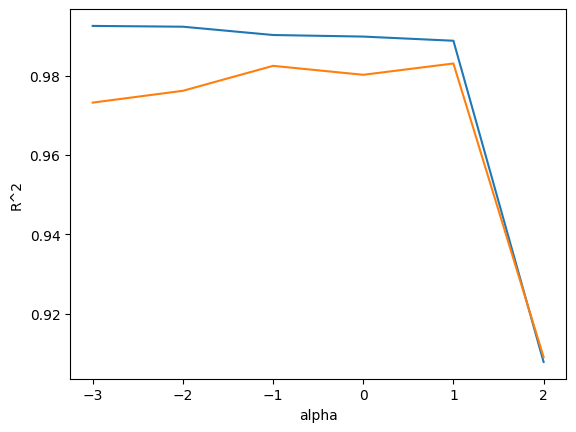

In [83]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [84]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))


0.9888067471131867
0.9824470598706695


In [85]:
print(np.sum(lasso.coef_ == 0))

40
